In [1]:
# Example for how to take a csv from data and predict proton scores
# also shows how to make score cuts

import predict_multi

In [4]:
# use bnb+cosmic monte carlo to test bdt
# predict_multi.py takes in csv, converts to pandas dataframe, predicts scores using bdt, 
# and returns dataframe with a score column for proton,muon,pion,em, and cosmic score
data = predict_multi.predict_data('data/bnb/featuresana_bnbcosmic_august.csv')

In [11]:
# ex: look at all of the cosmic scores:
data[['mscore_cos']]

,mscore_cos
0,0.000150
1,0.991786
2,0.976635
3,0.012406
4,0.988741
5,0.999126
6,0.465445
7,0.077194
8,0.960060
9,0.014253


In [12]:
# ex: look at muon scores for true muons:
data[['mscore_mu']][data.mcpdg == 13]

,mscore_mu
0,0.999446
7,0.068078
14,0.538466
18,0.005409
19,0.016048
23,0.014195
25,0.074315
26,0.021039
28,0.010238
29,0.000803


In [14]:
# can use "score_cut" function to get a set of tracks that passed at a certain proton score level
# input pandas dataframe of all tracks with scores and the score cut you want (90% here)
# output subset
data_pass = predict_multi.score_cut(data,0.95)

In [17]:
# see how many pass and how many are true protons?
print len(data_pass)
print len(data_pass[data_pass.mcpdg == 2212])
print 'Fraction true protons: {}'.format(np.true_divide(len(data_pass[data_pass.mcpdg == 2212]),len(data_pass)))

574
554
Fraction true protons: 0.965156794425


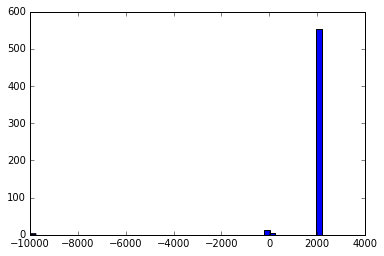

In [21]:
# plot particle types (-9999 == unknown pdg)
plt.hist(data_pass.mcpdg,bins=50);

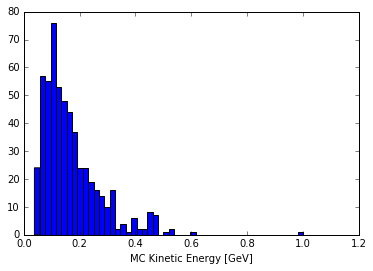

In [25]:
# can look at true energy of reconstructed protons
plt.hist(data_pass.mckinetic[data_pass.mcpdg == 2212],bins=50);
plt.xlabel('MC Kinetic Energy [GeV]');